In [1]:
import sys
sys.path.append('../../../Scripts/')

In [2]:
import text_preprocessing as tp
import baseline_model as base
import plots as pl
import pandas as pd, numpy as np


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 34.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 32.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to /Users/mash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
path = '../Data/'

## Data

In [5]:
train = pd.read_csv(f'{path}aspect_train.csv')
test = pd.read_csv(f'{path}aspect_test.csv')

## Preprocessing

In [6]:
prep = tp.Preprocessing('english')

In [7]:
train_prep = prep.main_preprocess(train, 
                                column= 'sentence',
                                tweet = False,
                                tweet_tags = False,
                                remove_stop_words = False,
                                lemmatize = False,
                                translate_emojis = False,
                                whitelist = "")

In [8]:
test_prep = prep.main_preprocess(test, 
                                column= 'sentence',
                                tweet = False,
                                tweet_tags = False,
                                remove_stop_words = False,
                                lemmatize = False,
                                translate_emojis = False,
                                whitelist = "")

## Baseline

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [10]:
target_names = ['self', 'future', 'world']

seed = 42

### Logistic Regression

Model: Logistic Regression(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.96


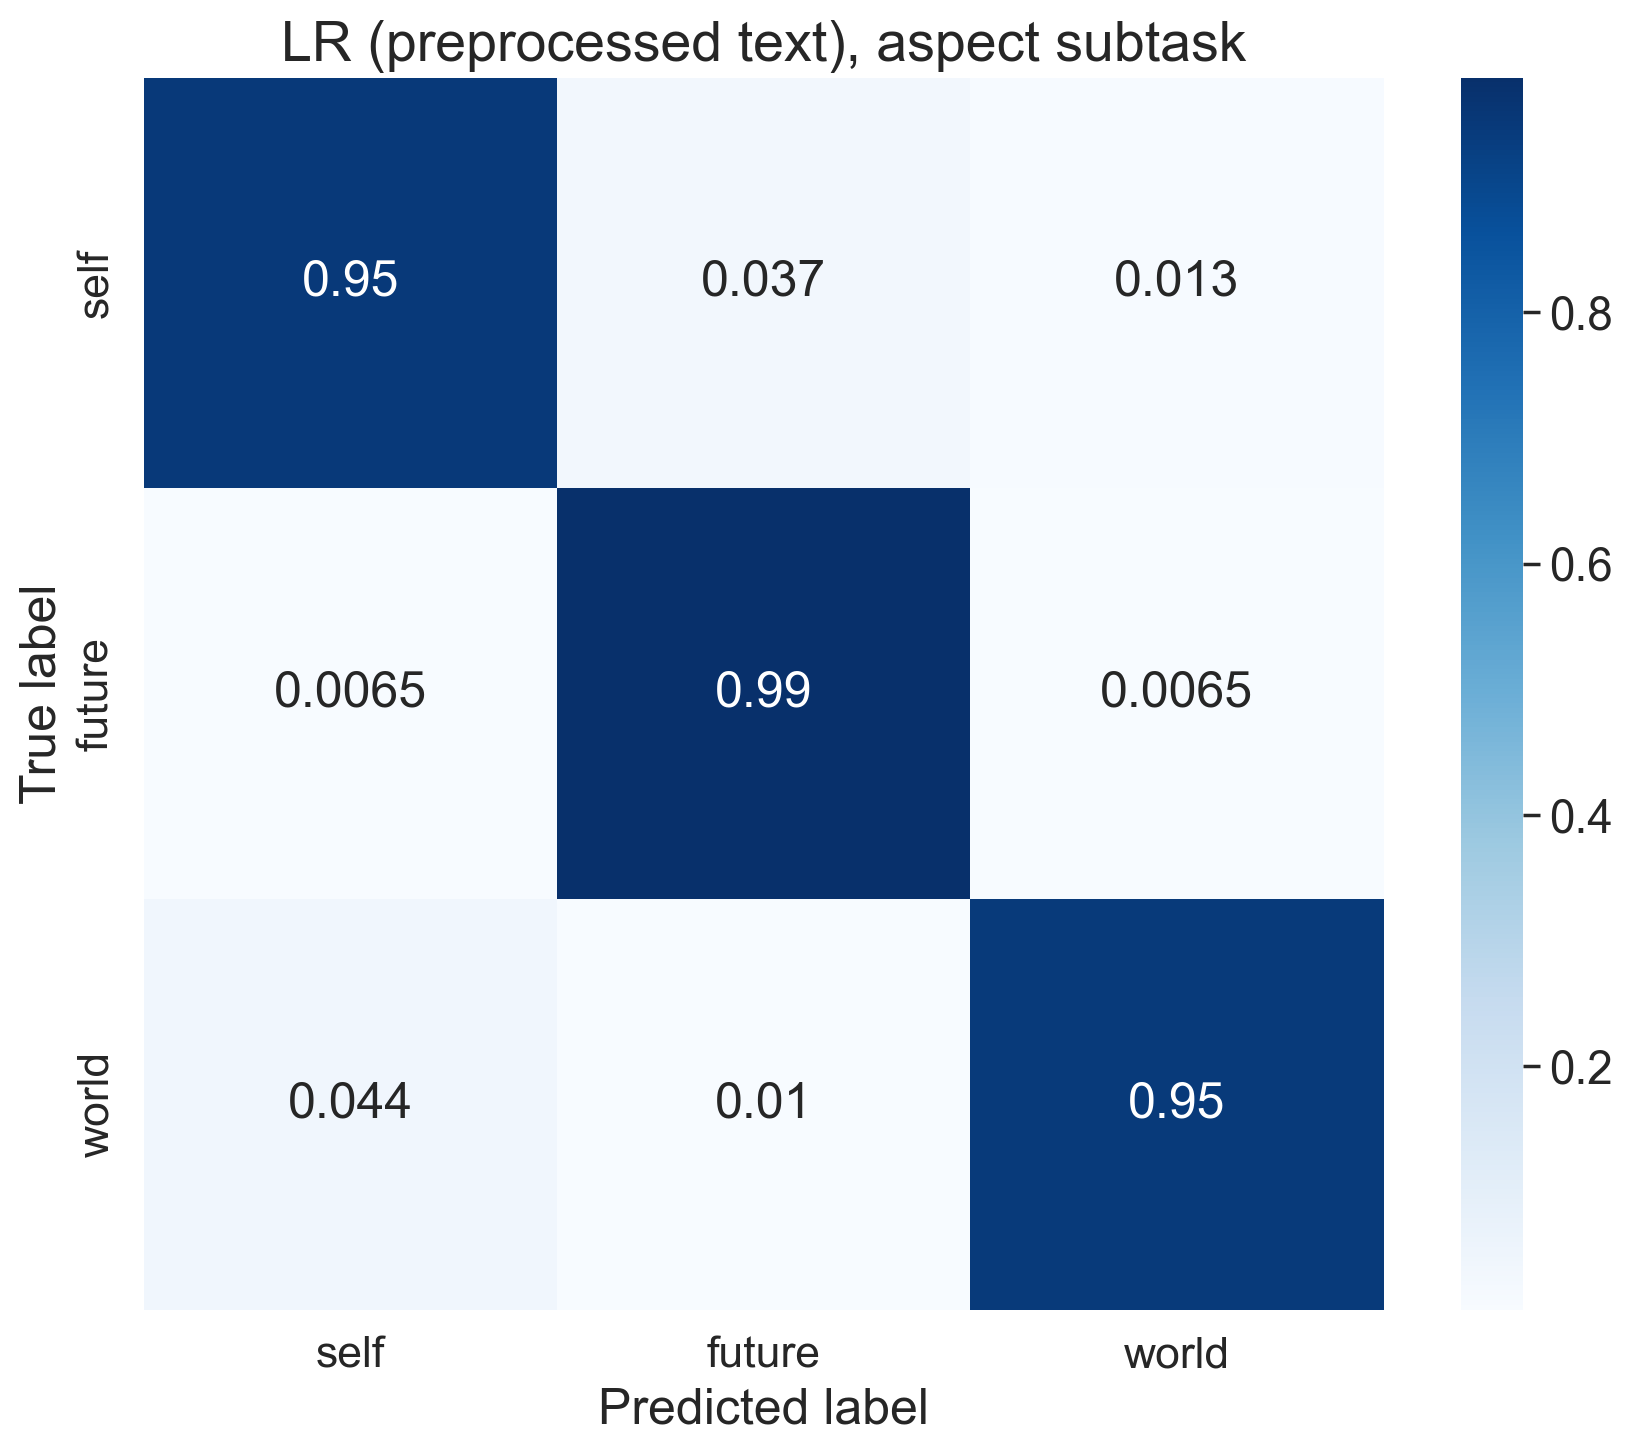

In [19]:
lr = LogisticRegression(random_state=seed)
b = base.Baseline(model=lr, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Logistic Regression', 
                target_names=target_names)

model_lr, vectorizer_lr, metrics_lr = b.baseline()

plot_lr = pl.Plots(metrics_lr)
plot_lr.plot_confusion_matrix(title='LR (preprocessed text), aspect subtask', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [12]:
print(metrics_lr[0])

              precision    recall  f1-score   support

        self       0.95      0.95      0.95       298
      future       0.96      0.99      0.97       308
       world       0.98      0.95      0.96       294

    accuracy                           0.96       900
   macro avg       0.96      0.96      0.96       900
weighted avg       0.96      0.96      0.96       900



### Random forest

Model: Random forest(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.95


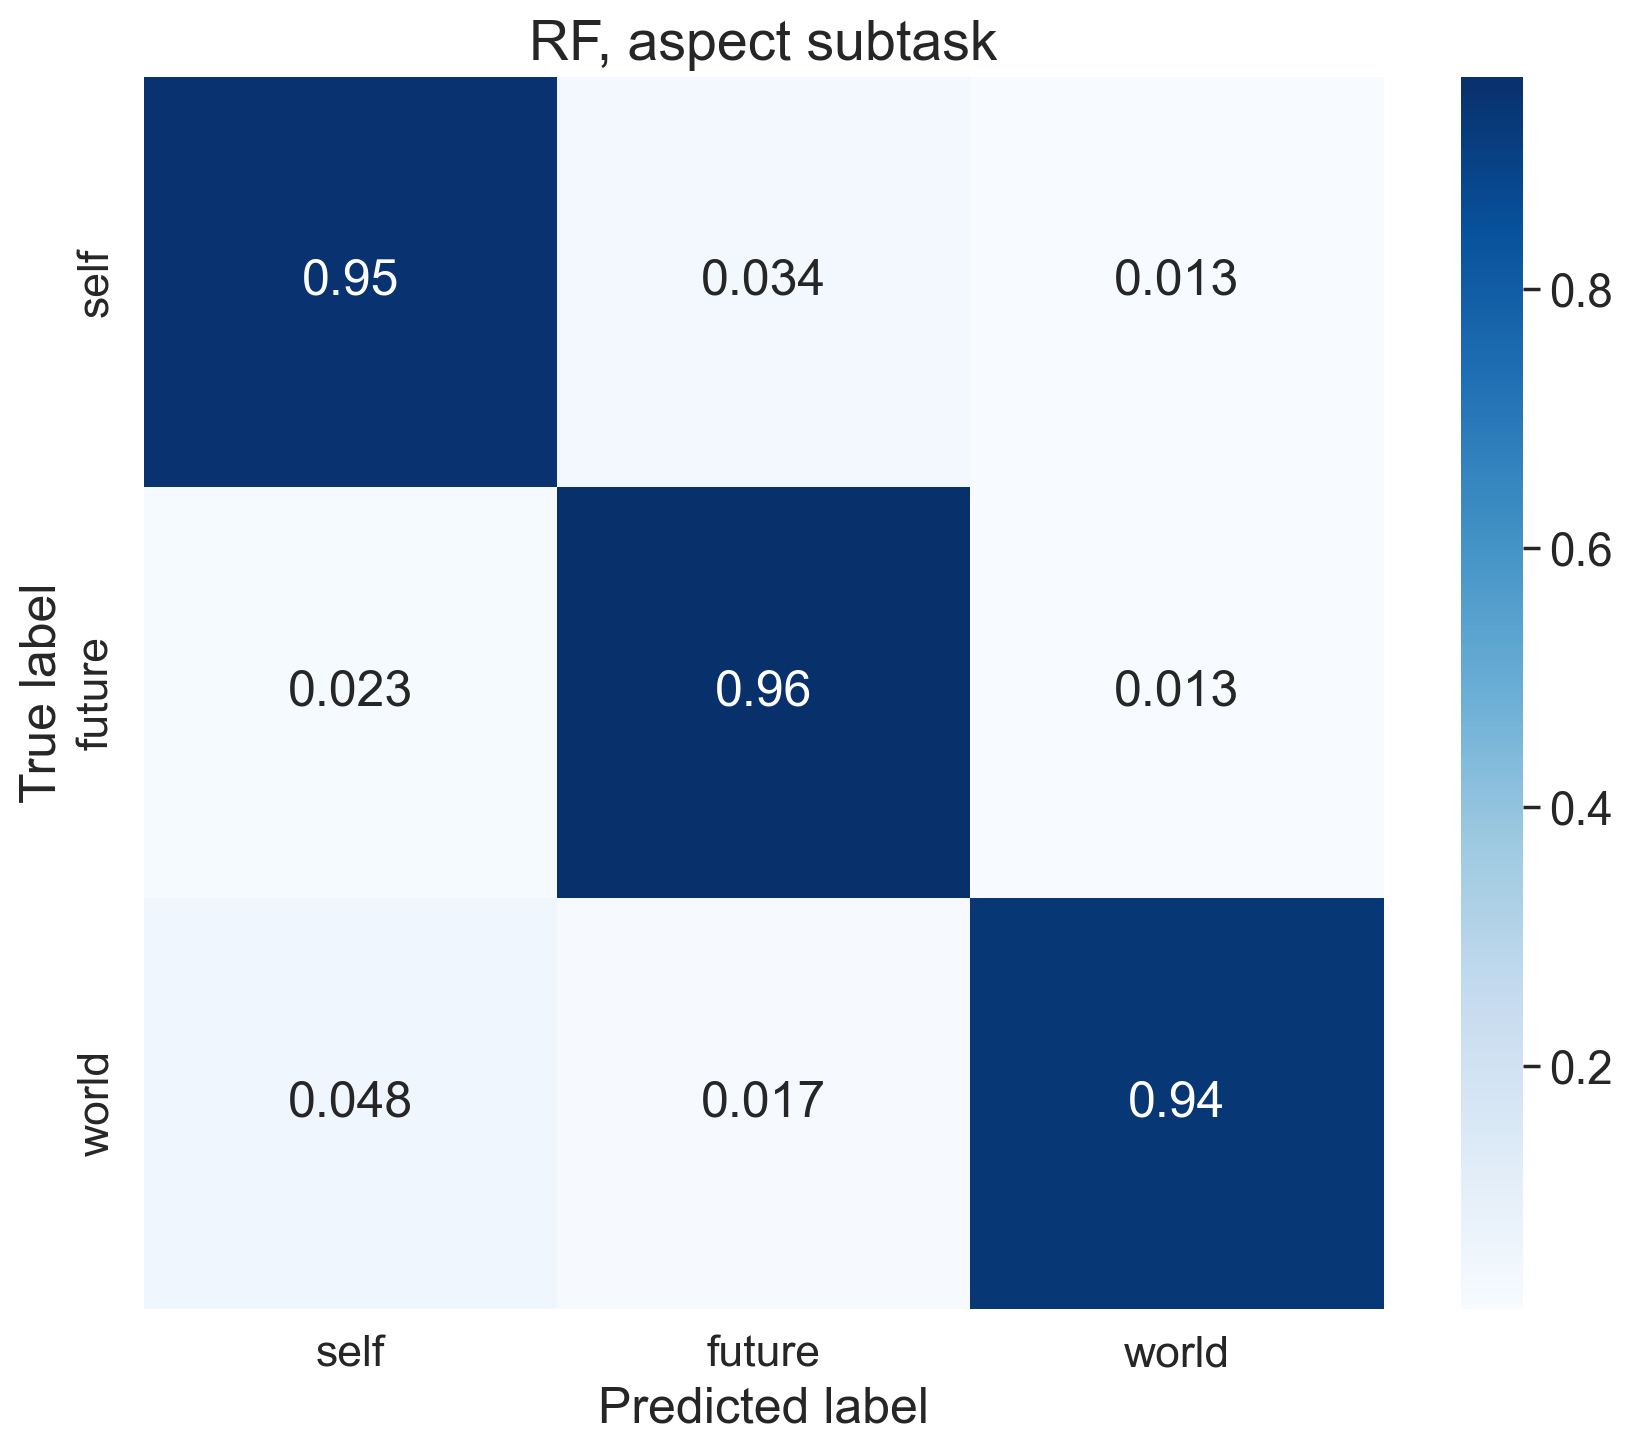

In [13]:
rf = RandomForestClassifier(random_state=seed)
b = base.Baseline(model=rf, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Random forest', 
                target_names=target_names)

model_rf, vectorizer_rf, metrics_rf = b.baseline()

plot_rf = pl.Plots(metrics_rf)
plot_rf.plot_confusion_matrix(title='RF, aspect subtask', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [14]:
print(metrics_rf[0])

              precision    recall  f1-score   support

        self       0.93      0.95      0.94       298
      future       0.95      0.96      0.96       308
       world       0.97      0.94      0.95       294

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



### Decision tree

Model: Decision tree(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.93


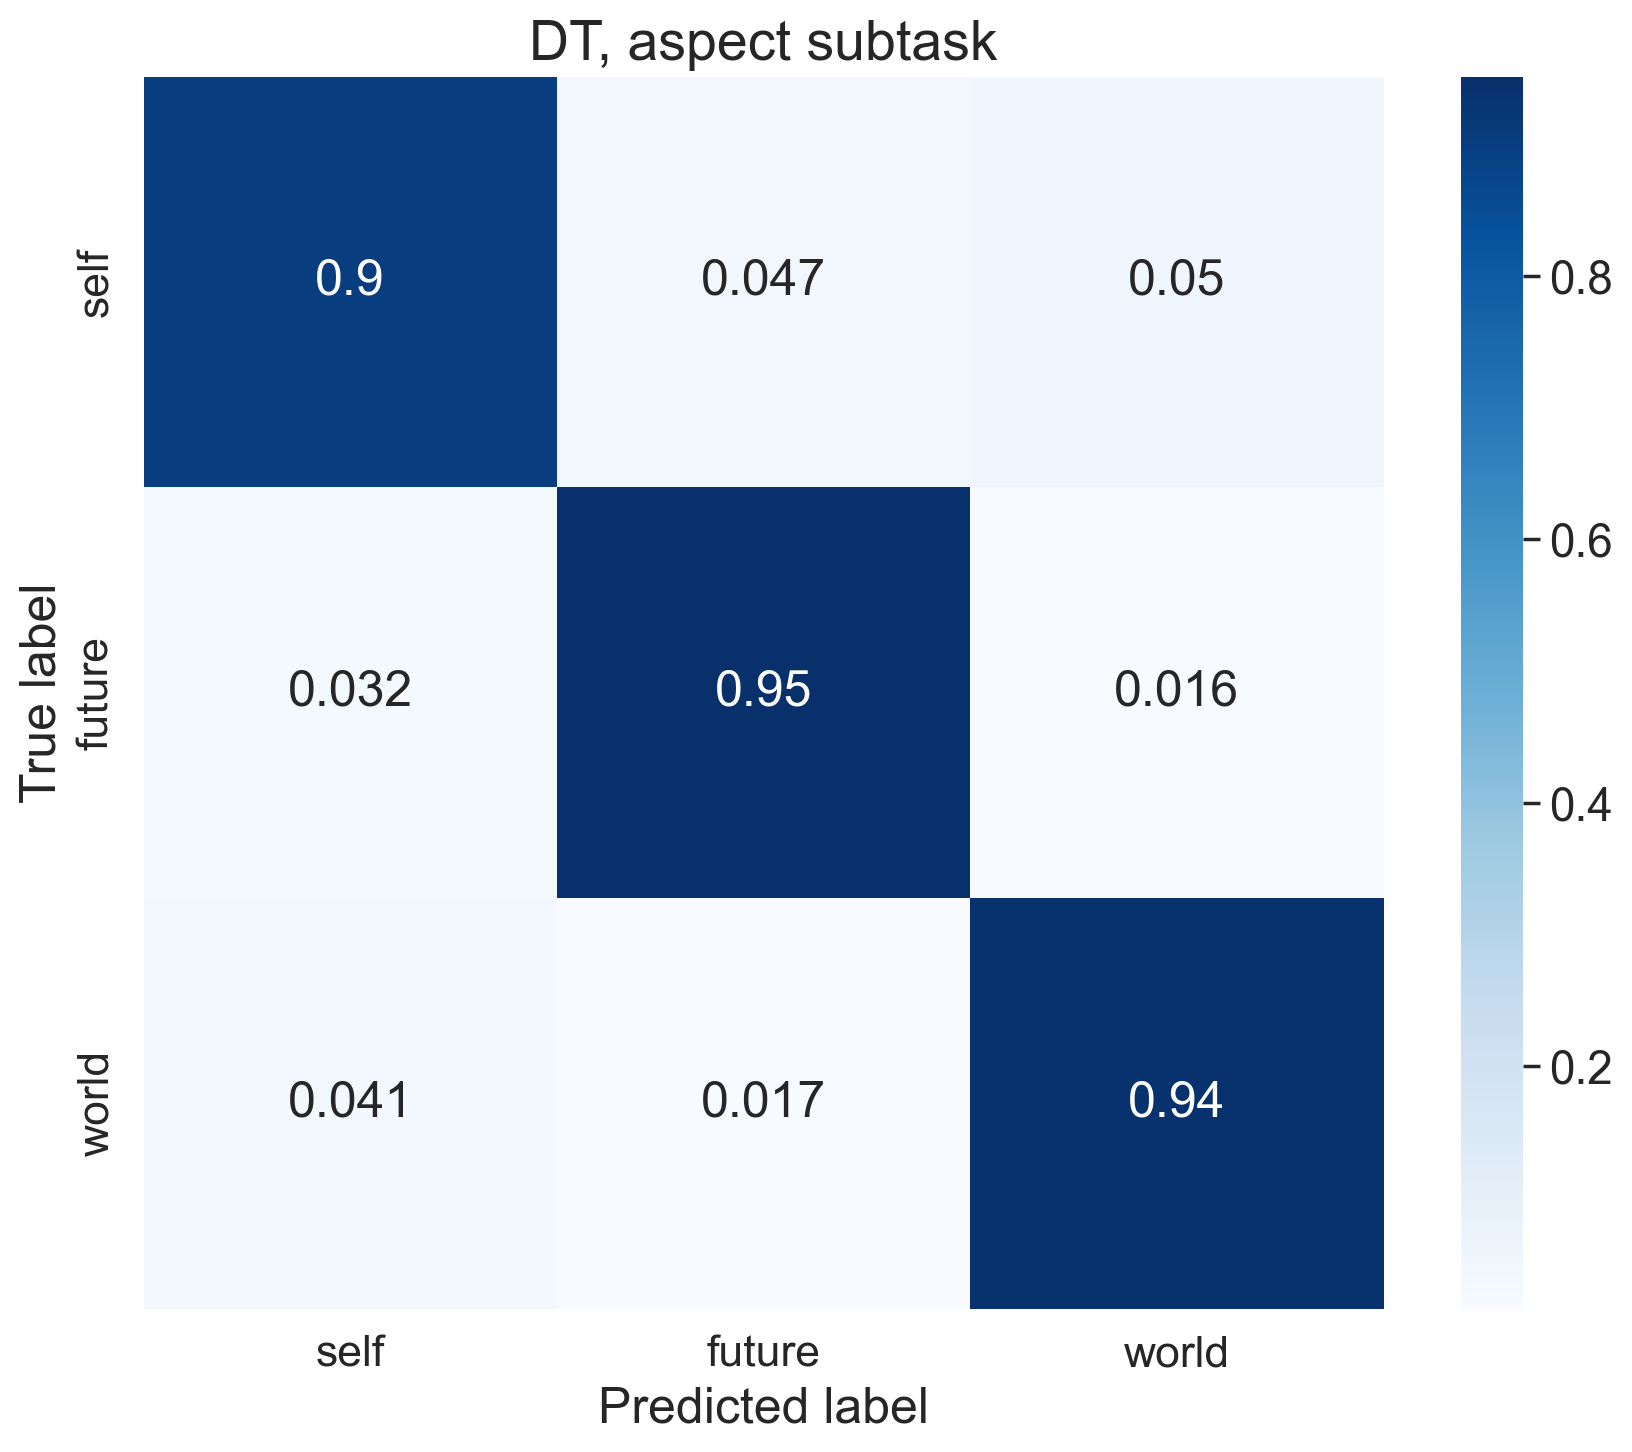

In [15]:
dt = DecisionTreeClassifier(random_state=seed)
b = base.Baseline(model=dt, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Decision tree', 
                target_names=target_names)

model_dt, vectorizer_dt, metrics_dt = b.baseline()

plot_dt = pl.Plots(metrics_dt)
plot_dt.plot_confusion_matrix(title='DT, aspect subtask', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [16]:
print(metrics_dt[0])

              precision    recall  f1-score   support

        self       0.92      0.90      0.91       298
      future       0.94      0.95      0.95       308
       world       0.93      0.94      0.94       294

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



### SVM

Model: SVM(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.96


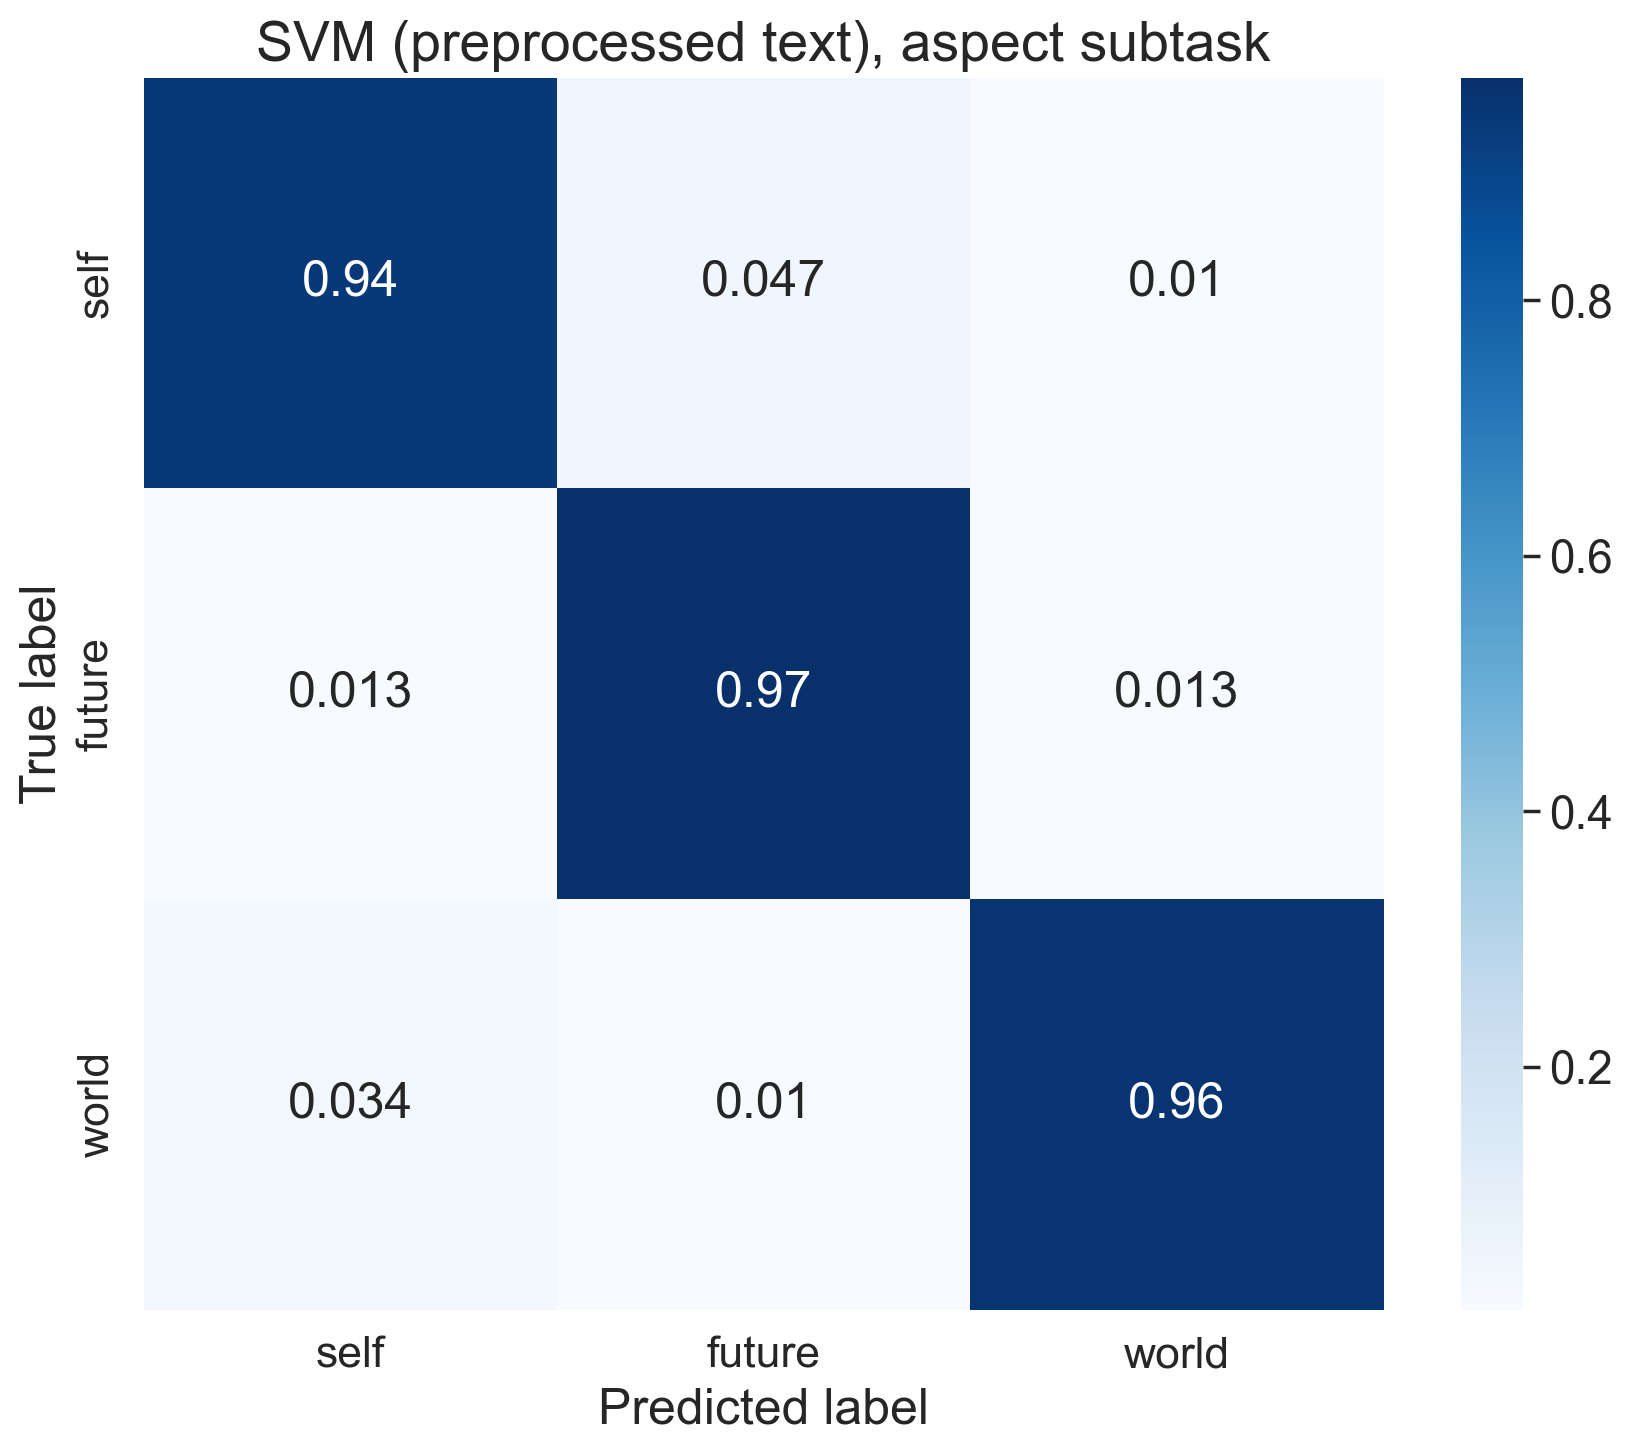

In [20]:
svm = SVC(random_state=seed)
b = base.Baseline(model=svm, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='SVM', 
                target_names=target_names)

model_svm, vectorizer_svm, metrics_svm = b.baseline()

plot_svm = pl.Plots(metrics_svm)
plot_svm.plot_confusion_matrix(title='SVM (preprocessed text), aspect subtask', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)

In [18]:
print(metrics_svm[0])

              precision    recall  f1-score   support

        self       0.95      0.94      0.95       298
      future       0.95      0.97      0.96       308
       world       0.98      0.96      0.97       294

    accuracy                           0.96       900
   macro avg       0.96      0.96      0.96       900
weighted avg       0.96      0.96      0.96       900

